# ANALYSIS

The key is to find unique latitude and longitude coordinates. Citipy, 
* citypy being used to identify unique cities.
* Then using weather and api, key factors such as temprature, humidity, wind speed and cloudiness values are gathered.

# Limitation:

* Clash of citypy and api, not necessary cities exist in both places
* Duplication
* Temperature Decreases as the latitude increased across the geography 

# Final Word

* In majority of the cities humidity ranges from 60 to 100 
* In majority of the cities wind speed ranges from 2 to 8 mph

In [1]:
!pip install citipy


notebook 5.4.0 requires ipykernel, which is not installed.
jupyter 1.0.0 requires ipykernel, which is not installed.
jupyter-console 5.2.0 requires ipykernel, which is not installed.
ipywidgets 7.1.1 requires ipykernel>=4.5.1, which is not installed.


In [2]:
# Import all Dependencies
from citipy import citipy

In [3]:
from random import uniform
import pandas as pd
import numpy as np
import csv
import random
import matplotlib.pyplot as plt
import requests as req
import json
import seaborn as sns
from datetime import datetime as dt

The Process of finding latitude, longitude and different distances from the equator

* -180 and 180 as the latitude(equator) coordinate 
* -90 and -90 as the longitude coordinate 

In [4]:
def newpoint():
    return uniform(-90,90), uniform(-180,180)

points = []
points = (newpoint() for x in range(1500))

# for x in points:
#     print(x)

columns = ("Lat", "Lng")
City_df = pd.DataFrame([x for x in points], columns=columns)
City_df.head()

,Lat,Lng
0,22.190245,-78.423002
1,-78.533381,-83.705738
2,-35.913216,-23.965499
3,-64.393034,91.105757
4,30.618913,21.662496


In [5]:
City_df["City"] = ""
City_df["Country"] = ""

In [6]:
for index, row in City_df.iterrows():
    city = citipy.nearest_city(row['Lat'], row['Lng']).city_name
    country = citipy.nearest_city(row['Lat'], row['Lng']).country_code
    City_df.set_value(index, "City", city)
    City_df.set_value(index, "Country", country)

C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


* Getting "City" and "Country"

In [7]:
City_Sample = City_df.drop_duplicates(subset='City').sample(n=570).reset_index()

In [8]:
City_Sample.count()

index      570
Lat        570
Lng        570
City       570
Country    570
dtype: int64

* setting the value higher than 500 to avoid the clash and a Key Error

In [9]:
City_Sample["Temp"] = ""
City_Sample["Humidity"] = ""
City_Sample["Date"] = ""
City_Sample["Wind Speed"] = ""
City_Sample["Cloudiness"] = ""
City_Sample

,index,Lat,Lng,City,Country,Temp,Humidity,Date,Wind Speed,Cloudiness
0,1222,46.472876,-76.298475,maniwaki,ca,,,,,
1,975,58.663196,177.525349,beringovskiy,ru,,,,,
2,362,56.764765,19.698616,liepaja,lv,,,,,
3,638,-1.151516,-36.844152,caucaia,br,,,,,
4,474,27.122732,97.678797,tezu,in,,,,,
5,1048,52.391720,-107.398870,langham,ca,,,,,
6,126,-77.874348,137.636578,hobart,au,,,,,
7,120,-22.489603,14.640854,swakopmund,na,,,,,
8,533,34.792388,103.821162,linxia,cn,,,,,
9,1187,-50.243648,131.666118,mount gambier,au,,,,,


In [10]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
api_key = "c766361480e700339d666a1c2a863033"

In [11]:
print("Beginning Data Retrieval")
counter = 0
for index, row in City_Sample.iterrows():
    target_url = url + "appid=" + api_key + "&units=" + units + "&q=" + row['City']
    cities_data = req.get(target_url).json()
    status_code = cities_data["cod"]
    if status_code == 200:
        City_Sample.set_value(index, "Temp", cities_data["main"]['temp_max'])
        City_Sample.set_value(index, "Humidity", cities_data["main"]["humidity"])
        City_Sample.set_value(index, "Date", cities_data["dt"])
        City_Sample.set_value(index, "Wind Speed", cities_data["wind"]["speed"])
        City_Sample.set_value(index, "Cloudiness", cities_data["clouds"]["all"])
        counter = counter + 1
       
        print("------------------------")
        print("Proceesing Record : " , counter, '|' , cities_data["name"])
        print(target_url)
    else:
            City_Sample.set_value(index, "Temp","" )
            City_Sample.set_value(index, "Humidity","")
            City_Sample.set_value(index, "Date", "")
            City_Sample.set_value(index, "Wind Speed","")
            City_Sample.set_value(index, "Cloudiness", "")
    

Beginning Data Retrieval


C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
C:\Users\HP\Anaconda3\envs\Pyt

------------------------
Proceesing Record :  1 | Maniwaki
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=maniwaki
------------------------
Proceesing Record :  2 | Beringovskiy
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=beringovskiy
------------------------
Proceesing Record :  3 | Liepaja
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=liepaja
------------------------
Proceesing Record :  4 | Caucaia
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=caucaia
------------------------
Proceesing Record :  5 | Tezu
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=tezu
------------------------
Proceesing Record :  6 | Langham
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units

------------------------
Proceesing Record :  50 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=jamestown


C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\HP\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use

------------------------
Proceesing Record :  51 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=cabo san lucas
------------------------
Proceesing Record :  52 | Srednekolymsk
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=srednekolymsk
------------------------
Proceesing Record :  53 | Bubaque
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=bubaque
------------------------
Proceesing Record :  54 | Finnsnes
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=finnsnes
------------------------
Proceesing Record :  55 | Muros
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=muros
------------------------
Proceesing Record :  56 | Verkhnevilyuysk
http://api.openweathermap.org/data/2.5/weather?appid=c76636

------------------------
Proceesing Record :  99 | Comodoro Rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=comodoro rivadavia
------------------------
Proceesing Record :  100 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=carnarvon
------------------------
Proceesing Record :  101 | San Patricio
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=san patricio
------------------------
Proceesing Record :  102 | Mapiripan
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=mapiripan
------------------------
Proceesing Record :  103 | Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=los llanos de aridane
------------------------
Proceesing Record :  104 | Provideniya
http://api.ope

------------------------
Proceesing Record :  147 | Tommot
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=tommot
------------------------
Proceesing Record :  148 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=bredasdorp
------------------------
Proceesing Record :  149 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=avarua
------------------------
Proceesing Record :  150 | Pustoshka
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=pustoshka
------------------------
Proceesing Record :  151 | Naron
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=naron
------------------------
Proceesing Record :  152 | Beloha
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a86303

------------------------
Proceesing Record :  195 | Carutapera
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=carutapera
------------------------
Proceesing Record :  196 | Pachino
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=pachino
------------------------
Proceesing Record :  197 | Veraval
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=veraval
------------------------
Proceesing Record :  198 | Mehamn
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=mehamn
------------------------
Proceesing Record :  199 | Watsa
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=watsa
------------------------
Proceesing Record :  200 | Celestun
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a86303

------------------------
Proceesing Record :  243 | Tasiilaq
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=tasiilaq
------------------------
Proceesing Record :  244 | Cape Town
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=cape town
------------------------
Proceesing Record :  245 | Lebu
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=lebu
------------------------
Proceesing Record :  246 | Boende
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=boende
------------------------
Proceesing Record :  247 | Helong
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=helong
------------------------
Proceesing Record :  248 | Kozhva
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&unit

------------------------
Proceesing Record :  291 | Ellisras
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=ellisras
------------------------
Proceesing Record :  292 | Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=havre-saint-pierre
------------------------
Proceesing Record :  293 | Yarim
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=yarim
------------------------
Proceesing Record :  294 | Mardin
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=mardin
------------------------
Proceesing Record :  295 | Dali
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=dali
------------------------
Proceesing Record :  296 | Jalu
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1

------------------------
Proceesing Record :  339 | Saint George
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=saint george
------------------------
Proceesing Record :  340 | Bambous Virieux
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=bambous virieux
------------------------
Proceesing Record :  341 | Harper
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=harper
------------------------
Proceesing Record :  342 | Mogadishu
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=mogadishu
------------------------
Proceesing Record :  343 | Yulara
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=yulara
------------------------
Proceesing Record :  344 | Kapaa
http://api.openweathermap.org/data/2.5/weather?appid=c7663614

------------------------
Proceesing Record :  387 | Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=punta arenas
------------------------
Proceesing Record :  388 | Ambon
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=ambon
------------------------
Proceesing Record :  389 | Morant Bay
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=morant bay
------------------------
Proceesing Record :  390 | Bunda
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=bunda
------------------------
Proceesing Record :  391 | Ancud
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=ancud
------------------------
Proceesing Record :  392 | Dubbo
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a8630

------------------------
Proceesing Record :  435 | Karratha
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=karratha
------------------------
Proceesing Record :  436 | Angoche
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=angoche
------------------------
Proceesing Record :  437 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=hithadhoo
------------------------
Proceesing Record :  438 | Coihaique
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=coihaique
------------------------
Proceesing Record :  439 | Bluff
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=bluff
------------------------
Proceesing Record :  440 | Unity
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a86

------------------------
Proceesing Record :  483 | Abonnema
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=abonnema
------------------------
Proceesing Record :  484 | Norman Wells
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=norman wells
------------------------
Proceesing Record :  485 | Laguna
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=laguna
------------------------
Proceesing Record :  486 | Mataura
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=mataura
------------------------
Proceesing Record :  487 | Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700339d666a1c2a863033&units=Imperial&q=puerto ayora
------------------------
Proceesing Record :  488 | Khani
http://api.openweathermap.org/data/2.5/weather?appid=c766361480e700

* Fetchig data from API 
* included a start and close time to check runtime
* for cities not found on weather map, Pass blank and set a counter to move on


In [12]:
City_Sample


,index,Lat,Lng,City,Country,Temp,Humidity,Date,Wind Speed,Cloudiness
0,1222,46.472876,-76.298475,maniwaki,ca,71.03,89,1527821929,8.75,92
1,975,58.663196,177.525349,beringovskiy,ru,34.85,95,1527821929,10.87,12
2,362,56.764765,19.698616,liepaja,lv,55.4,76,1527821400,4.7,0
3,638,-1.151516,-36.844152,caucaia,br,80.6,78,1527822000,13.87,75
4,474,27.122732,97.678797,tezu,in,72.74,76,1527821930,0.92,56
5,1048,52.391720,-107.398870,langham,ca,53.6,76,1527818400,9.17,90
6,126,-77.874348,137.636578,hobart,au,53.6,62,1527818400,9.17,40
7,120,-22.489603,14.640854,swakopmund,na,46.4,87,1527818400,8.05,0
8,533,34.792388,103.821162,linxia,cn,62.03,52,1527821931,2.48,20
9,1187,-50.243648,131.666118,mount gambier,au,54.2,81,1527821714,4.05,36


In [13]:
City_Sample = pd.DataFrame(City_Sample)
len(City_Sample)

570

In [14]:
City_Sample['Cloudiness'].replace('', np.nan, inplace=True)
City_Sample.dropna(subset=['Cloudiness'], inplace=True)

len(City_Sample)

505

In [15]:
City_Sample = City_Sample.drop_duplicates(["City"])
len(City_Sample)

505

* Removing all duplicates and getting a final value for the number of cities.

In [16]:
City_Sample.to_csv("CityData.csv")

In [17]:
Date = dt.now().strftime("(%m/%d/%Y)")

# Latitude vs Temperature Plot

# Conclusion: temperature is warmer for majority of cities close to the equator

# It's summer

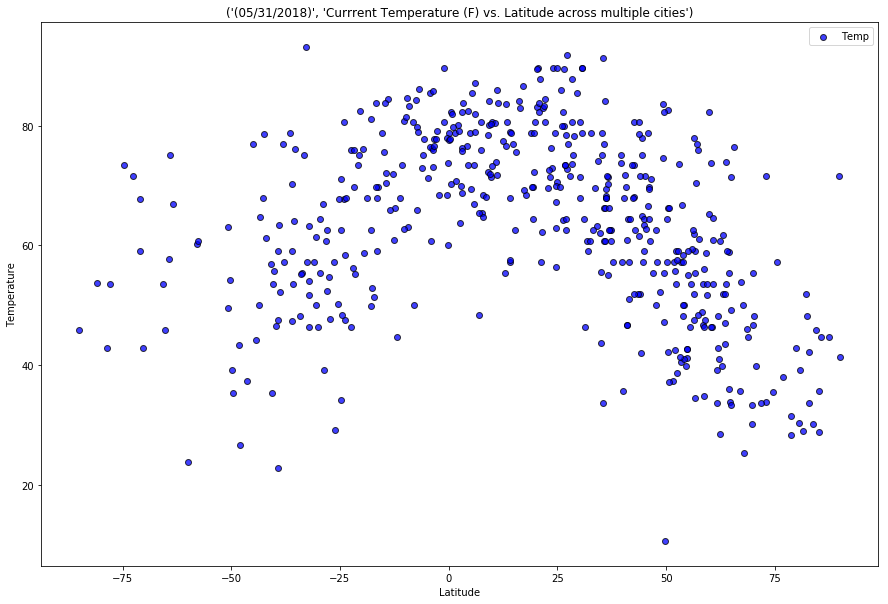

In [18]:
# Plot scatter plot with Temperature (F) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(City_Sample["Lat"], City_Sample["Temp"], marker="o", facecolors="blue", edgecolors="black",
    alpha=0.75)
plt.legend()
templatChartTitle = Date, "Currrent Temperature (F) vs. Latitude across multiple cities"

# Included a horizontal line at y = 0 to depict Equator

# plt.axvline(y=0, color='r', linestyle='-')
plt.title(templatChartTitle)
plt.ylabel("Temperature")
plt.xlabel("Latitude")

plt.savefig('TempLatChartTitle.png')

# Latitude vs. Humidity Plot

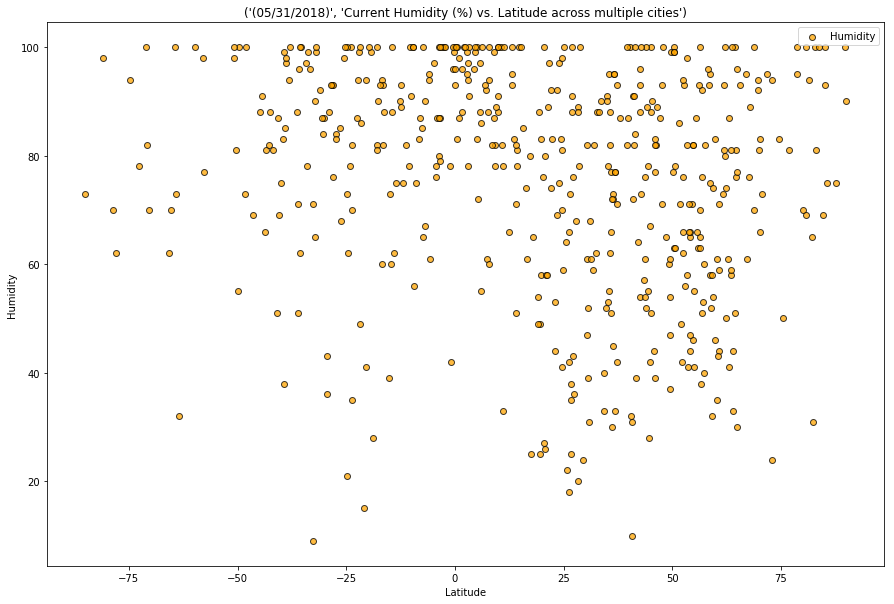

In [19]:
# Plot scatter plot with Cloudiness (%) vs. Latitude and save as .png
plt.figure(figsize=(15,10))
plt.scatter(City_Sample["Lat"], City_Sample["Humidity"], marker="o", facecolors="orange", edgecolors="black",
            alpha=0.75)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
HumLatChartTitle = Date, "Current Humidity (%) vs. Latitude across multiple cities"
plt.title(HumLatChartTitle)
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig('HumLatChartTitle.png')

# Latitude vs. Cloudiness Plot

# Cloudiness, refers to the fraction of the sky obscured by clouds when observed from a particular location. 

# As per the Graph it is high as well as low due to opposite climate conditions in northern and southern hemisphere

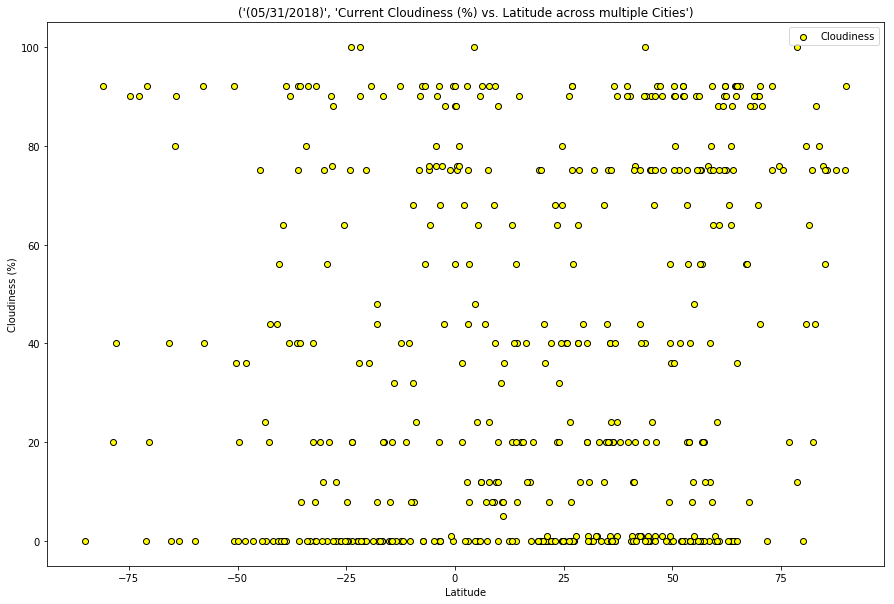

In [20]:
# Plot scatter plot with Cloudiness (%) vs. Latitude and save as .png

plt.figure(figsize=(15,10))
plt.scatter(City_Sample["Lat"], City_Sample["Cloudiness"], marker="o", facecolors="Yellow", edgecolors="black",
            alpha=1)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
ClouLatChartTitle = Date, "Current Cloudiness (%) vs. Latitude across multiple Cities"
plt.title(ClouLatChartTitle)
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig('ClouLatChartTitle.png')

# Latitude vs. Wind Speed Plot

# As menioned It's summer so the Wind speed id not so high but a trend of increase is noticable so 

# "winter is coming"


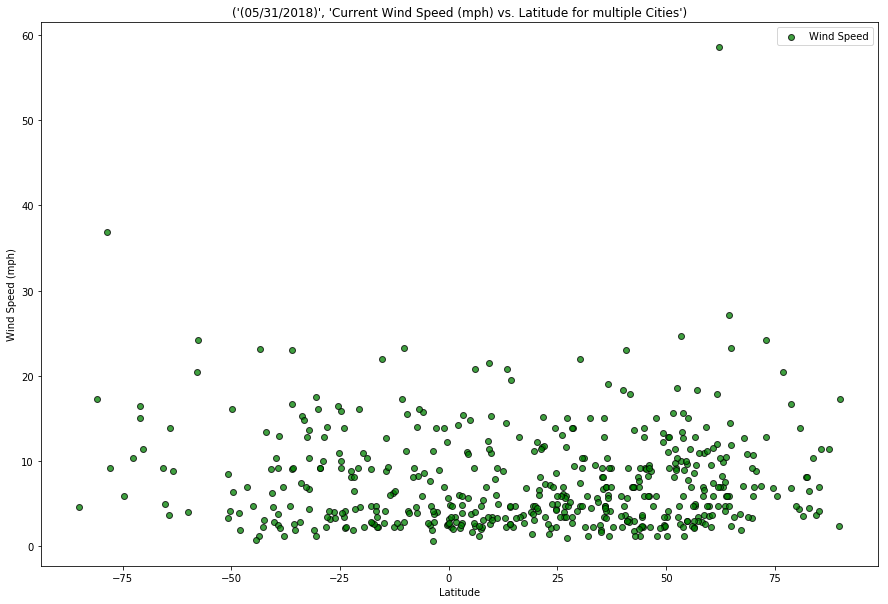

In [21]:
plt.figure(figsize=(15,10))
plt.scatter(City_Sample["Lat"], City_Sample["Wind Speed"], marker="o", facecolors="Green", edgecolors="black",
            alpha=0.75)
plt.legend()
# plt.axvline(y=0, color='r', linestyle='-')
WindLatChartTitle = Date, "Current Wind Speed (mph) vs. Latitude for multiple Cities"
plt.title(WindLatChartTitle)
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig('WindLatChartTitle.png')